In [1]:
%cd drive/My\ Drive

/content/drive/My Drive


In [2]:
%cd case\ studies\ 2

/content/drive/My Drive/case studies 2


In [3]:
%cd Models/

/content/drive/My Drive/case studies 2/Models


In [4]:
%cd Face\ Models

/content/drive/My Drive/case studies 2/Models/Face Models


In [5]:
!ls

face_test_data.npy   face_train_data.npy   Trial
face_test_label.npy  face_train_label.npy  Untitled


In [6]:
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, BatchNormalization, Activation
from keras.models import Model
from keras import backend as K
from keras.utils.np_utils import to_categorical

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [0]:
train_data = np.load('face_train_data.npy', allow_pickle=True)
train_labels = np.load('face_train_label.npy', allow_pickle = True)
test_data = np.load('face_test_data.npy', allow_pickle = True)
test_labels = np.load('face_test_label.npy', allow_pickle = True)

In [0]:
train_df = pd.DataFrame(columns = ['train_labels'])
train_df['train_labels'] = train_labels

In [0]:
test_df = pd.DataFrame(columns = ['test_labels'])
test_df['test_labels'] = test_labels

In [0]:
X = train_data/255.0
X_test = test_data/255.0

In [0]:
y = train_labels

In [0]:
y_test = test_labels

In [0]:
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))
y_test = to_categorical(lb.fit_transform(y_test))

In [0]:
X_train = X[:24000]
y_train = y[:24000]
X_val = X[24000:]
y_val = y[24000:]

In [15]:
input_img = Input(shape = (64, 64, 3))
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(input_img)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(3, (3,3), activation = 'softmax', padding = 'same')(x)


In [16]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [17]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1849

In [0]:
filepath = 'face_autoencoder.h5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

In [19]:
autoencoder_train = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 256, verbose = 1, callbacks = callbacks_list, validation_data = [X_val, X_val])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 24000 samples, validate on 7994 samples
Epoch 1/100
24000/24000 [==============================] - 53s 2ms/step - loss: 1.6020 - acc: 0.7999 - val_loss: 1.5914 - val_acc: 0.9083

Epoch 00001: val_acc improved from -inf to 0.90832, saving model to face_autoencoder.h5
Epoch 2/100
24000/24000 [==============================] - 36s 2ms/step - loss: 1.5703 - acc: 0.9107 - val_loss: 1.5792 - val_acc: 0.9326

Epoch 00002: val_acc improved from 0.90832 to 0.93261, saving model to face_autoencoder.h5
Epoch 3/100
24000/24000 [==============================] - 36s 2ms/step - loss: 1.5678 - acc: 0.9188 - val_loss: 1.5770 - val_acc: 0.9391

Epoch 00003: val_acc improved from 0.93261 to 0.93912, saving model to face_autoencoder.h5
Epoch 4/100
24000/24000 [==============================] - 36s 2ms/step - loss: 1.5666 - acc: 0.9228 - val_loss: 1.5745 - val_acc: 0.9379

Epoch 00004: val_acc did not 

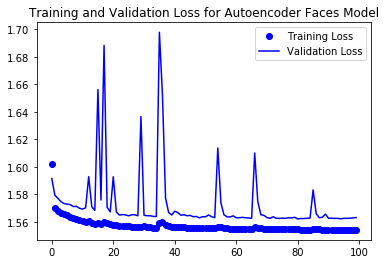

In [20]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss for Autoencoder Faces Model')
plt.legend()
plt.show()

In [0]:
autoencoder.save_weights('Autoencoder_Faces_Weights.h5')

In [0]:
input_img = Input(shape = (64, 64, 3))
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(input_img)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
output = Dense(160, activation = 'softmax')(x)

In [0]:
full_model = Model(input_img, output)

In [24]:
len(full_model.layers)

29

In [0]:
for l1, l2 in zip(full_model.layers[:26], autoencoder.layers[0:26]):
  l1.set_weights(l2.get_weights())

In [26]:
autoencoder.get_weights()[0][1]

array([[[-0.13205335, -0.09362765, -0.01680565, -0.04386548,
          0.07735714, -0.11334502, -0.07388371, -0.10048779,
         -0.03278591, -0.04950107, -0.11741651, -0.09982558,
         -0.05605496,  0.05711193,  0.10572096,  0.01279089,
          0.05406658,  0.17087547, -0.14371319, -0.17108881,
         -0.04456146, -0.09664675, -0.03279164, -0.12719059,
         -0.12144398,  0.08033599,  0.01919387, -0.0389156 ,
          0.11676726,  0.00249902,  0.05575931, -0.09397209],
        [ 0.14094172, -0.01029029,  0.02237911, -0.03719529,
         -0.13880298,  0.15350087,  0.06964681,  0.06165554,
         -0.08416193,  0.10543042, -0.06946059, -0.02356171,
         -0.11121215,  0.1073991 , -0.01460132,  0.02247388,
         -0.0888775 , -0.02956122,  0.11848701,  0.09147485,
         -0.02630254, -0.08377942, -0.02699859,  0.04592564,
          0.00887432, -0.00145939, -0.09636784,  0.03761072,
          0.12377509,  0.025453  , -0.09374881, -0.05756369],
        [-0.12921423, 

In [27]:
full_model.get_weights()[0][1]

array([[[-0.13205335, -0.09362765, -0.01680565, -0.04386548,
          0.07735714, -0.11334502, -0.07388371, -0.10048779,
         -0.03278591, -0.04950107, -0.11741651, -0.09982558,
         -0.05605496,  0.05711193,  0.10572096,  0.01279089,
          0.05406658,  0.17087547, -0.14371319, -0.17108881,
         -0.04456146, -0.09664675, -0.03279164, -0.12719059,
         -0.12144398,  0.08033599,  0.01919387, -0.0389156 ,
          0.11676726,  0.00249902,  0.05575931, -0.09397209],
        [ 0.14094172, -0.01029029,  0.02237911, -0.03719529,
         -0.13880298,  0.15350087,  0.06964681,  0.06165554,
         -0.08416193,  0.10543042, -0.06946059, -0.02356171,
         -0.11121215,  0.1073991 , -0.01460132,  0.02247388,
         -0.0888775 , -0.02956122,  0.11848701,  0.09147485,
         -0.02630254, -0.08377942, -0.02699859,  0.04592564,
          0.00887432, -0.00145939, -0.09636784,  0.03761072,
          0.12377509,  0.025453  , -0.09374881, -0.05756369],
        [-0.12921423, 

In [0]:
for layer in full_model.layers[0:26]:
  layer.trainable = False

In [0]:
full_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [30]:
full_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1849

In [31]:
filepath = 'pretrained_face_best_weights.h5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]
pretrained_classifier_train = full_model.fit(X_train, y_train, epochs = 100, batch_size = 256, verbose = 1, callbacks = callbacks_list, validation_data = [X_val, y_val])

Train on 24000 samples, validate on 7994 samples
Epoch 1/100
24000/24000 [==============================] - 11s 462us/step - loss: 4.7028 - acc: 0.0591 - val_loss: 3.9413 - val_acc: 0.1566

Epoch 00001: val_acc improved from -inf to 0.15662, saving model to pretrained_face_best_weights.h5
Epoch 2/100
24000/24000 [==============================] - 10s 416us/step - loss: 3.1899 - acc: 0.2768 - val_loss: 2.7404 - val_acc: 0.3459

Epoch 00002: val_acc improved from 0.15662 to 0.34588, saving model to pretrained_face_best_weights.h5
Epoch 3/100
24000/24000 [==============================] - 10s 419us/step - loss: 2.2909 - acc: 0.4450 - val_loss: 2.2334 - val_acc: 0.4463

Epoch 00003: val_acc improved from 0.34588 to 0.44633, saving model to pretrained_face_best_weights.h5
Epoch 4/100
24000/24000 [==============================] - 10s 415us/step - loss: 1.7969 - acc: 0.5585 - val_loss: 1.8286 - val_acc: 0.5425

Epoch 00004: val_acc improved from 0.44633 to 0.54253, saving model to pretrained

In [0]:
full_model.save_weights('full_model_pretrained_faces_weights.h5')

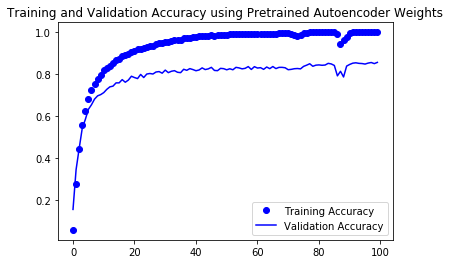

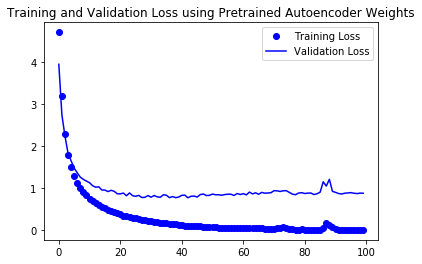

In [33]:
accuracy = pretrained_classifier_train.history['acc']
val_accuracy = pretrained_classifier_train.history['val_acc']
loss = pretrained_classifier_train.history['loss']
val_loss = pretrained_classifier_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy using Pretrained Autoencoder Weights')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss using Pretrained Autoencoder Weights')
plt.legend()
plt.show()

In [0]:
test_eval = full_model.evaluate(X_test, y_test, verbose = 0)

In [35]:
print('Test loss : ', test_eval[0])
print('Test accuracy : ', test_eval[1])

Test loss :  1.0425702388510107
Test accuracy :  0.82975


In [0]:
predicted_classes = full_model.predict(X_test)

In [0]:
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)

In [0]:
predicted_classes = lb.inverse_transform(predicted_classes)

In [0]:
test_df['predicted_classes'] = predicted_classes

In [43]:
test_df.head()

,test_labels,predicted_classes
0,Sergey_Lavrov,Sergey_Lavrov
1,Gloria_Macapagal_Arroyo,Gloria_Macapagal_Arroyo
2,George_W_Bush,George_W_Bush
3,Michael_Bloomberg,Michael_Bloomberg
4,Nestor_Kirchner,Tommy_Franks


In [44]:
test_df[test_df['test_labels'] != test_df['predicted_classes']]

,test_labels,predicted_classes
4,Nestor_Kirchner,Tommy_Franks
12,Trent_Lott,Bill_McBride
16,Pierce_Brosnan,Juan_Carlos_Ferrero
32,John_Snow,Dick_Cheney
34,Atal_Bihari_Vajpayee,Alejandro_Toledo
...,...,...
7984,Muhammad_Ali,Dominique_de_Villepin
7986,Pervez_Musharraf,Silvio_Berlusconi
7994,Lance_Armstrong,Rudolph_Giuliani
7996,Vaclav_Havel,Ricardo_Lagos


In [45]:
1-round(len(test_df[test_df['test_labels'] != test_df['predicted_classes']])/len(test_df),3)

0.8240000000000001

In [0]:
test_df.to_csv('predicted_results.csv')